In [1]:
import torch
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm

In [2]:
#path of the respective csv files

training_data_path = r'D:\Coding\Python Programming\Modules\Pytorch\csvs\fashion-mnist_train.csv'
test_data_path = r'D:\Coding\Python Programming\Modules\Pytorch\csvs\fashion-mnist_test.csv'

#loading the csv files uning pandas

training_data = pd.read_csv(training_data_path)
test_data = pd.read_csv(test_data_path)

#converting them into numpy array

training_data = np.array(training_data)
test_data = np.array(test_data)

#converting them into torch(we cant convert the initial training_data directly to tensors as they are a dataframe object)

training_data = torch.from_numpy(training_data)
test_data = torch.from_numpy(test_data)

training_data.shape

In [ ]:
#spliting the training data into training and validation data
train_data, validation_data = random_split(training_data, [50000,10000])

In [ ]:
#Creating Batches for training
batch_size = 128
train_dl = DataLoader(train_data, batch_size = batch_size, shuffle = True)
valid_dl = DataLoader(validation_data, batch_size= batch_size, shuffle= False)

In [ ]:
#Now the values of the inputs in the csv file are between (0,255) so we need to scale the inputs and for that we will divide the input valiables by 255
#creating the model
class FashionModel(torch.nn.Module):
    def __init__(self, input_size, layer_size, output_size):
        super().__init__()
        self.linear1 = torch.nn.Linear(input_size, layer_size)
        self.linear2 = torch.nn.Linear(layer_size, output_size)
    
    def forward(self, x):
        x = x/255
        out = self.linear1(x)
        out = torch.relu(out)
        out = self.linear2(out)
        out = torch.softmax(out, dim = 0)
        return out

input_size = 784
layer_size = 64
output_size = 10
model = FashionModel(input_size, layer_size, output_size)   

In [ ]:
targets = training_data[:,0]
targets

60000

In [ ]:
#making training loop

loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.02)

epochs = 5

for epoch in tqdm(range(epochs)):
    for i in train_dl:
        input_data = i[:,1:785]
        label_arr = i[:,0]
        label = []
        for _ in label_arr:
            var = np.zeros(10)
            var[int(_)] = 1
            label.append(var.astype(np.float32))
        label = torch.tensor(label)
        
        preds = model(input_data)
        loss = loss_fn(preds, label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

In [ ]:
from matplotlib import pyplot as plt

0.75
Prediction: 0, Label: 0


16

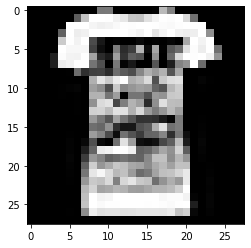

In [ ]:
#Checking the accuracy with the data from Validation Set(valid_dl) And mapping the image using matplotlib
with torch.no_grad():
    for i in valid_dl:
        input_validation = i[:,1:785]
        label = i[:,0]
        preds = model(input_validation)
    preds_arr = torch.argmax(preds,1)
    accuracy = torch.sum(preds_arr == label).item()/len(preds_arr)
print(accuracy)
i = 3
print("Prediction: {}, Label: {}".format(preds_arr[i], label[i]))
plt.imshow(input_validation[i].reshape(28,28), cmap='gray')